![qd1](img/qd1.png)

![qd2](img/qd2.png)

![qd3](img/qd3.png)

![qd4](img/qd4.png)


In [226]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from jupyterthemes import jtplot
jtplot.style(theme='oceans16', context='notebook', ticks=True, grid=False)
#sys.modules[__name__].__dict__.clear()
'''(*/////////////////////////////Динамика волновой функции*)'''
xmin = 0 
xmax = 1
Nx = 100
dx = (xmax - xmin) / Nx
t = 0
dt = 0.01
psi = [0] * Nx
psin = [0] * Nx
F = [0] * (Nx - 1)
R = [0] * (Nx - 1)
S = [0] * (Nx - 1)


def V(x):
    if (x >= 0 and x <= 0.2) or (x >= 0.7 and x < 1):
        return 50
    else:
        return 0
        
def U(n):
    return -2 + dx**2 * (4 * 1j / dt - 2 * V(dx * n))

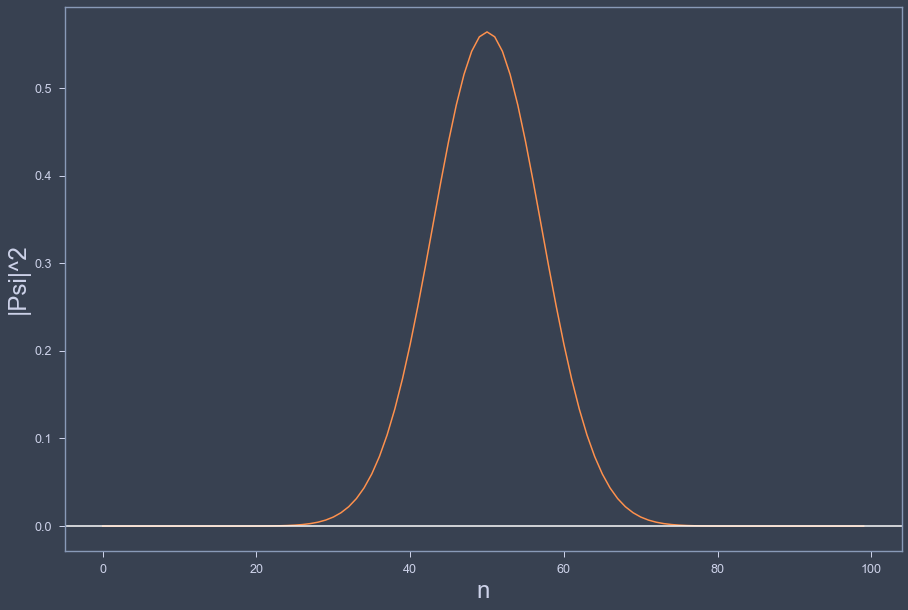

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


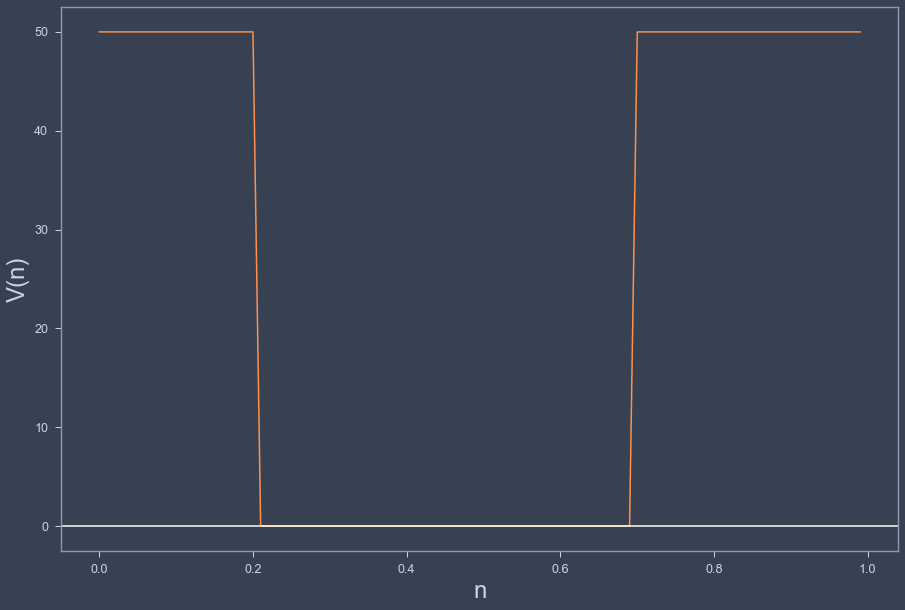

In [253]:
Ppsin = []
Et = 100
k = Et**0.5

for i in range(Nx - 1):
    psin[i] = np.exp(-(dx * i - dx * Nx / 2)**2 / (2 * (dx * 10)**2) \
                     + 1j * k * dx * i)
S1 = 0

for i in range(Nx):
    S1 = S1 + abs(psin[i])**2

for i in range(Nx):
    psin[i] = psin[i] / (10*dx * S1)**0.5
    Ppsin.append(abs(psin[i])**2)

plt.figure(figsize=(15, 10))
plt.plot(Ppsin, color='y')
plt.ylabel('|Psi|^2', fontsize=24)
plt.xlabel('n', fontsize=24)
plt.axhline(y = 0, color="w")
plt.show()

nn = np.arange(0, xmax, dx)
print(nn)
plt.figure(figsize=(15, 10))
plt.plot(nn, [V(nn[i]) for i in range(len(nn))], color='y')
plt.ylabel('V(n)', fontsize=24)
plt.xlabel('n', fontsize=24)
plt.axhline(y = 0, color="w")
plt.show()

In [254]:
for t in range(150):
    for i in range(Nx):
        psi[i] = psin[i]

    psi[0] = 0
    psi[Nx - 1] = 0  #  (*граничные условия*);
    R[Nx - 2] = 0 
    S[Nx - 2] = 0

    for i in range(1, Nx - 1):
        F[i] = -(psi[i + 1] + psi[i - 1] + np.conjugate(U(i)) * psi[i])
    for i in range(Nx - 1):
        R[Nx - i - 3] = -(1 / (U(Nx - i) + R[Nx - i - 2]))

    for i in range(Nx - 1):
        S[Nx - i - 3] = -R[Nx - i - 3] * (F[Nx - i - 2] - S[Nx - i - 2])

    psi[1] = S[0] 
    for i in range(1, Nx - 2):
        psi[i + 1] = R[i] * psi[i] + S[i]

    b = [] 
    for i in range(1, Nx):
        b.append(abs(psi[i])**2)

    for i in range(Nx):
        psin[i] = psi[i]

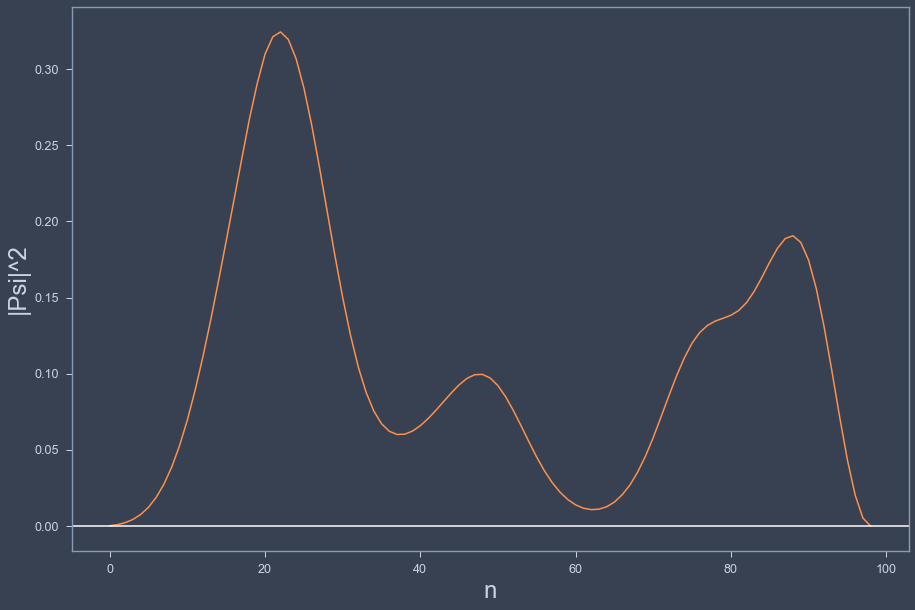

In [255]:
plt.figure(figsize=(15, 10))
plt.plot(b, color='y')
plt.ylabel('|Psi|^2', fontsize=24)
plt.xlabel('n', fontsize=24)
plt.axhline(y = 0, color="w")
plt.show()